### Pablo Chantada Saborido (pablo.chantada@udc.es)
### José Romero Conde (j.rconde@udc.es)

# CARGA DE DATOS

In [1]:
from Utils import DatasetProcess, reconstruction_plot, anomaly_report, plot_atipicos, plot_model
from ConvModel import ConvModel
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining
from OneClass import AnomalyDetector
from Contrastive import ContrastiveModel, SemiSupervisedContrastiveModel

2025-04-04 23:32:55.068455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743802375.079028  213878 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743802375.082218  213878 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743802375.091332  213878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743802375.091343  213878 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743802375.091345  213878 computation_placer.cc:177] computation placer alr

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = DatasetProcess.load()
(unlabeled_train, x_train, y_train), (x_val, y_val), (x_test, y_test) = DatasetProcess.hold_out(
    train=(x_train_full, y_train_full),
    test=(x_test, y_test),
    validation_size=2000
)

In [3]:
# Verificar las dimensiones
print(f"Datos no etiquetados: {unlabeled_train.shape}")
print(f"Datos etiquetados entrenamiento: {x_train.shape}")
print(f"Etiquetas entrenamiento: {y_train.shape}")
print(f"Datos validación: {x_val.shape}")
print(f"Etiquetas validación: {y_val.shape}")
print(f"Datos prueba: {x_test.shape}")
print(f"Etiquetas prueba: {y_test.shape}")

Datos no etiquetados: (40000, 32, 32, 3)
Datos etiquetados entrenamiento: (8000, 32, 32, 3)
Etiquetas entrenamiento: (8000, 1)
Datos validación: (2000, 32, 32, 3)
Etiquetas validación: (2000, 1)
Datos prueba: (10000, 32, 32, 3)
Etiquetas prueba: (10000, 1)


# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

In [4]:
model_base = ConvModel()
history_base = model_base.fit(
    x_train, 
    y_train,
    validation_data=(x_val, y_val),
    batch_size=512,
    epochs=100
)

/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-04 15:42:12.083865: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-04 15:42:12.084167: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-04 15:42:12.084192: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-04 15:42:12.084537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-04 15:42:12.084580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow de

Epoch 1/100


2025-04-04 15:42:14.041373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


17/17 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.0239 - loss: 9.6634 - val_accuracy: 0.0088 - val_loss: 9.1032
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0583 - loss: 8.7684 - val_accuracy: 0.0090 - val_loss: 8.8335
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0786 - loss: 8.2417 - val_accuracy: 0.0109 - val_loss: 8.5663
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0797 - loss: 7.7981 - val_accuracy: 0.0112 - val_loss: 8.2789
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.0968 - loss: 7.3741 - val_accuracy: 0.0098 - val_loss: 8.0147
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.0940 - loss: 6.9809 - val_accuracy: 0.0207 - val_loss: 7.7459
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.0985 - loss: 6.6633 - val_accuracy: 0.0122 - val_loss: 7.5826
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1055 - loss: 6.4022 - val_accuracy: 0.0099 - val_loss: 7.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3283 - loss: 3.1141
Accuracy en conjunto de prueba: 0.32100000977516174


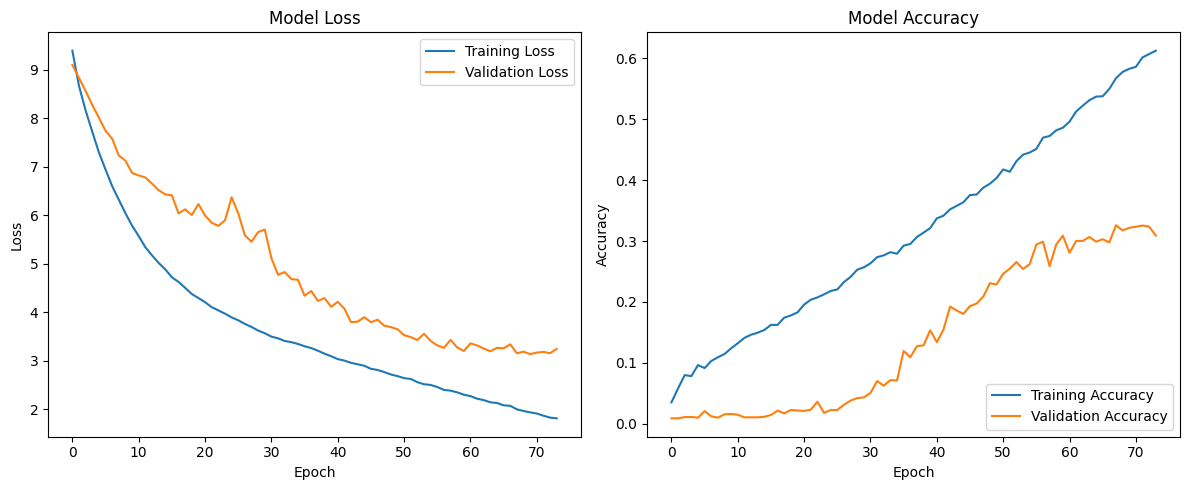

In [9]:
# Evalúa con el conjunto de prueba
base_accuracy = model_base.score(x_test, y_test)
print(f"Accuracy en conjunto de prueba: {base_accuracy}")

model_base.plot(history_base)

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [ ]:
# Función para crear modelos consistentes durante self-training
def create_model():
    return ConvModel(
        learning_rate=0.0005,  # Learning rate reducido para fine-tuning
        dropout_prob=0.25,     
        l2_lambda=0.005        
    )

# Aplica self-training con datos no etiquetados
final_model = ConvModel.self_training_v2(
    model_func=create_model,
    x_train=x_train,
    y_train=y_train,  
    unlabeled_data=unlabeled_train,
    validation_data=(x_val, y_val),
    thresh=0.85,             
    train_epochs=4,
    verbose=1
)

# Evalúa el modelo final
final_accuracy = final_model.score(x_test, y_test)
print(f"Accuracy del modelo final con self-training: {final_accuracy}")
print(f"Mejora respecto al modelo base: {final_accuracy - base_accuracy:.4f}")

/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1743802424.486091  213878 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1104 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:06:00.0, compute capability: 8.6
/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


E0000 00:00:1743802431.443042  213878 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1743802433.608084  214063 cuda_dnn.cc:529] Loaded cuDNN version 90501


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.0259 - loss: 17.7046 - val_accuracy: 0.0215 - val_loss: 16.2950
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.0653 - loss: 15.7132 - val_accuracy: 0.0405 - val_loss: 11.6728
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.0830 - loss: 14.2369 - val_accuracy: 0.0725 - val_loss: 9.5419
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.0893 - loss: 12.9621 - val_accuracy: 0.0405 - val_loss: 8.8245
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1083 - loss: 11.9435 - val_accuracy: 0.0685 - val_loss: 7.9909
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.1143 - loss: 11.2338 - val_accuracy: 0.0765 - val_loss: 7.4014
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1353 - loss: 10.6089 - val_accuracy: 0.1105 - val_loss: 6.8713
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1334 - loss: 10.1751 - val_accuracy: 0.1

---
Como se han cambiado los datos los volvemos a cargarlos para una comparación justa

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = DatasetProcess.load()
(unlabeled_train, x_train, y_train), (x_val, y_val), (x_test, y_test) = DatasetProcess.hold_out(
    train=(x_train_full, y_train_full),
    test=(x_test, y_test),
    validation_size=2000
)	

In [ ]:
# Aplica self-training con datos no etiquetados
final_model = ConvModel.self_training_v2(
    model_func=create_model,
    x_train=x_train,
    y_train=y_train,  
    unlabeled_data=unlabeled_train,
    validation_data=(x_val, y_val),
    thresh=0.6,             
    train_epochs=4,
    verbose=1
)

# Evalúa el modelo final
final_accuracy = final_model.score(x_test, y_test)
print(f"Accuracy del modelo final con self-training: {final_accuracy}")
print(f"Mejora respecto al modelo base: {final_accuracy - base_accuracy:.4f}")

In [ ]:
unlabeled_train, x_train, y_train, x_val, y_val, x_test, y_test, one_hot_train, one_hot_val, one_hot_test = DatasetProcess.load_dataset()

# EJERCICIO 3

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en dos pasos (primero el autoencoder, después el clasificador). La arquitectura del encoder debe ser exactamente la misma que la definida en los Ejercicios 1 y 2, a excepción del último bloque de capas.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los Ejercicios 1 y 2?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [5]:
autoencoder = TwoStepAutoEncoder(
                                input_shape=unlabeled_train[0].shape,
                                learning_rate=0.01,
                                l2_lambda=0.0005,
                                dropout_prob=0.01)
classifier = TwoStepClassifier(
                              l2_lambda=0.0005,
                              dropout_prob=0.05,
                               learning_rate=0.05)


/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
TwoStepTraining(autoencoder=autoencoder, 
                classifier=classifier, 
                x_train=x_train, 
                y_train=one_hot_train, 
                unlabeled_train=unlabeled_train, 
                validation_data=(x_val, one_hot_val),
                batch_size_autoencoder=512,
                epochs_autoencoder=30,
                batch_size_classifier=4096,
                epochs_classifier=50)

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - loss: 0.4267 - val_loss: 0.1758
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - loss: 0.1231 - val_loss: 0.1258
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - loss: 0.1060 - val_loss: 0.1144
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - loss: 0.0963 - val_loss: 0.1204
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - loss: 0.0929 - val_loss: 0.1099
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - loss: 0.0967 - val_loss: 0.1228
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - loss: 0.0970 - val_loss: 0.1419
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - loss: 0.1348 - val_loss: 0.1085
Epoch 9/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - loss: 0.1199 - val_loss: 0.0972
Epoch 10/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - loss: 0.0986 - val_loss: 0.2003
Epoch 11/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - loss: 0.1088 - val_loss: 0.0986
Epoch 12/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


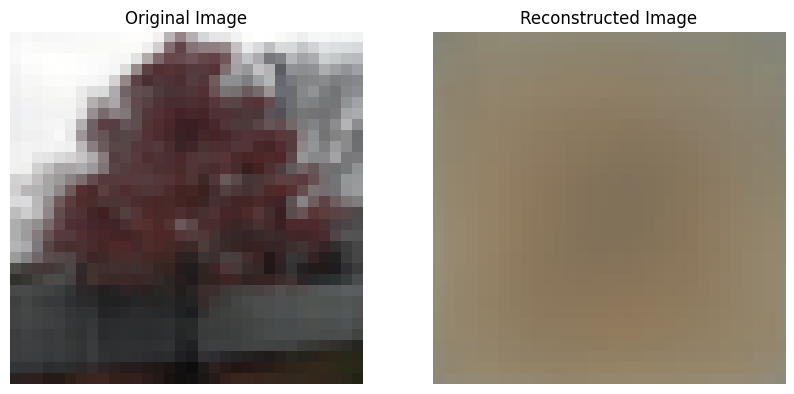

In [7]:
reconstruction_plot(autoencoder, x_test)

In [10]:
code = autoencoder.get_encoded_data(x_test)
test_accuracy = classifier.score(code, y_test)
print(f"Accuracy en conjunto de prueba: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0039 - loss: 28558.1602     
Accuracy en conjunto de prueba: 0.00430000014603138
Mejora respecto al modelo base: -0.3167


# EJERCICIO 4

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en un paso (autoencoder y clasificador al mismo tiempo). La arquitectura del autoencoder será la misma que la definida en el Ejercicio 3, y la combinación de encoder y clasificador será igual a la arquitectura definida en el
Ejercicio 1.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los ejercicios anteriores?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [11]:
one_step_autoencoder = OneStepAutoencoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0035,
                                decoder_extra_loss_weight = 0.5,
                                l2_lambda=0.00005,
                                dropout_prob=0.05)

In [12]:
h = OneStepTraining(one_step_autoencoder, 
                    x_train=x_train, 
                    y_train=one_hot_train, 
                    unlabeled_train=unlabeled_train,
                    batch_size=512,
                    epochs=30,
                    patience=4)

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - classifier_accuracy: 0.0269 - classifier_loss: 0.9440 - decoder_loss: 0.0599 - loss: 0.6961
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - classifier_accuracy: 0.0211 - classifier_loss: 0.8326 - decoder_loss: 0.0434 - loss: 0.5621
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - classifier_accuracy: 0.0239 - classifier_loss: 0.7983 - decoder_loss: 0.0413 - loss: 0.5076
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - classifier_accuracy: 0.0249 - classifier_loss: 0.7840 - decoder_loss: 0.0409 - loss: 0.4883
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - classifier_accuracy: 0.0229 - classifier_loss: 0.7876 - decoder_loss: 0.0398 - loss: 0.4838
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - classifier_accuracy: 0.0244 - classifier_loss: 0.7834 - decoder_loss: 0.0397 - loss: 0.4801
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - classifier_accuracy: 0.0250 - classifier_loss: 0.7886 - decoder_loss: 0.0395 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


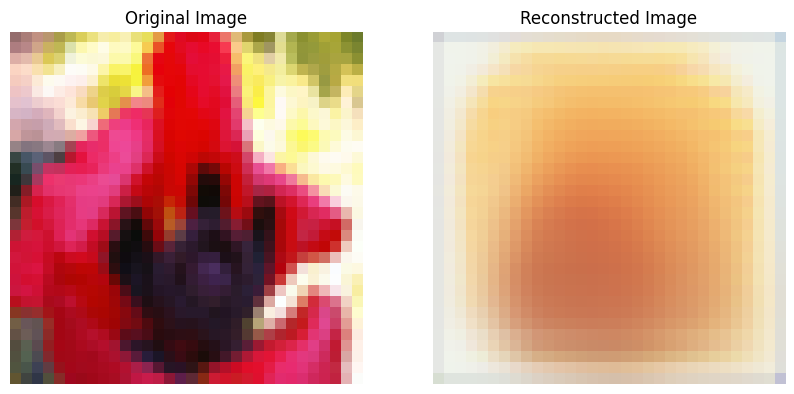

In [13]:
reconstruction_plot(one_step_autoencoder, x_test)

In [14]:
test_accuracy = one_step_autoencoder.score(x_test, y_test)
print(f"Accuracy en conjunto de prueba: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
Accuracy en conjunto de prueba: 0.0249
Mejora respecto al modelo base: -0.2961


# EJERCICIO 5

Repite el mismo entrenamiento de los Ejercicios 1-4, pero eliminando las instancias no etiquetadas
más atípicas con respecto a los datos etiquetados. Se cumplirán los siguientes puntos:
- La arquitectura de la red de clasificación en una clase será la misma a la utilizada en el
clasificador del Ejercicio 1, a excepción de la capa de salida.
- Utiliza la técnica explicada en el Notebook 5, usando un valor de 𝑣 = 0,9.

Responde a la siguiente pregunta:
1. ¿Se mejoran los resultados con respecto a los anteriores ejercicios? ¿Qué conclusiones sacas de estos resultados?

In [15]:
anomalyDetector = AnomalyDetector(input_shape=(32,32,3), 
                        nu=.9,
                        l2_lambda=0.0,
                        learning_rate=0.0001,
                        dropout_prob=0.0)
anomalyDetector.fit(x_train, 
          batch_size=256, 
          epochs=35, 
          delta=.025, 
          steps=100)

/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step- loss: 0.4015 
Cambiando r a 0.7996135 , max: 0.8071422 , min: 0.79856277
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 815ms/step - loss: 0.3990
Epoch 2/35
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step- loss: 0.1040 
Cambiando r a 0.87701654 , max: 0.8850079 , min: 0.8744295
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 760ms/step - loss: 0.1036
Epoch 3/35
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step- loss: 0.0894 
Cambiando r a 0.90988547 , max: 0.92342716 , min: 0.9055848
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 738ms/step - loss: 0.0893
Epoch 4/35
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step- loss: 0.0898 
Cambiando r a 0.9093729 , max: 0.93130255 , min: 0.9034465
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 775ms/step - loss: 0.0897
Epoch 5/35
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step- loss: 0.0757 
Cambiando r a 0.9010569 , max: 0.9535227 , min: 0.83252776
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 715ms/step - loss: 0.0758
Epoch 6/35
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step- loss: 0.0756 
Cambiando r

<Sequential name=sequential_5, built=True>

In [16]:
filtered_unlabeled_train, is_typical = anomaly_report(anomalyDetector, unlabeled_train)

1047/1047 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step
Porcentaje de datos no etiquetados etiquetados como típicos: 89.80%
Porcentaje de datos no etiquetados etiquetados como atípicos: 10.20%
Datos originales no etiquetados: (33500, 32, 32, 3)
Datos filtrados no etiquetados (solo típicos): (30082, 32, 32, 3)
Se eliminaron 3418 muestras atípicas


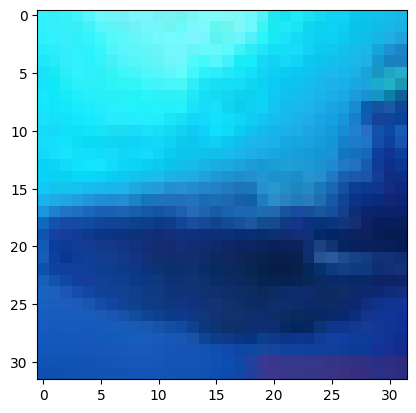

In [17]:
plot_atipicos(is_typical, unlabeled_train)

---
Ahora que tenemos los datos filtrados, repetimos

---

In [ ]:
### Ejercicio 2 con datos filtrados
(x_train_full, y_train_full), (x_test, y_test) = DatasetProcess.load()
(unlabeled_train, x_train, y_train), (x_val, y_val), (x_test, y_test) = DatasetProcess.hold_out(
    train=(x_train_full, y_train_full),
    test=(x_test, y_test),
    validation_size=2000
)	

def create_model():
    return ConvModel(
        learning_rate=0.0005,  # Learning rate reducido para fine-tuning
        dropout_prob=0.25,     
        l2_lambda=0.005        
    )

model_self_filtered = ConvModel.self_training_v2(
    model_func=create_model,
    x_train=x_train,
    y_train=y_train,
    unlabeled_data=filtered_unlabeled_train,
    validation_data=(x_val, y_val),
    thresh=0.85,
    train_epochs=4
)

# Evaluar los modelos filtrados
test_accuracy_self_filtered = model_self_filtered.score(x_test, y_test)
print(f"Accuracy en conjunto de prueba (self-training filtrado): {test_accuracy_self_filtered}")
print(f"Mejora respecto al modelo base: {test_accuracy_self_filtered - base_accuracy:.4f}")

In [ ]:
unlabeled_train, x_train, y_train, x_val, y_val, x_test, y_test, one_hot_train, one_hot_val, one_hot_test = DatasetProcess.load_dataset()

/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - loss: 0.2852 - val_loss: 0.0955
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - loss: 0.0690 - val_loss: 0.1163
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - loss: 0.0706 - val_loss: 0.1324
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - loss: 0.0676 - val_loss: 0.1373
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - loss: 0.1044 - val_loss: 0.1019
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - loss: 0.0699 - val_loss: 0.1282
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - loss: 0.0931 - val_loss: 0.1854
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - loss: 0.0965 - val_loss: 0.0871
Epoch 9/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - loss: 0.0857 - val_loss: 0.1043
Epoch 10/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - loss: 0.0818 - val_loss: 0.1037
Epoch 11/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - loss: 0.0726 - val_loss: 0.0781
Epoch 12/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 

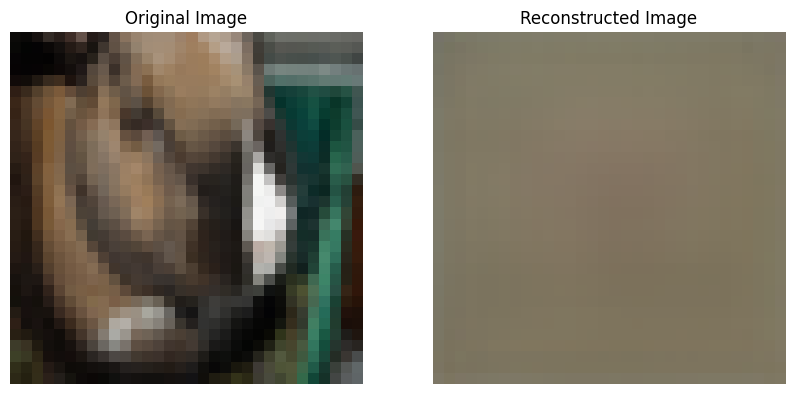

In [20]:
# Ejercicio 3 con datos filtrados
autoencoder_filtered = TwoStepAutoEncoder(
    input_shape=filtered_unlabeled_train[0].shape,
    learning_rate=0.006,
    l2_lambda=0.0005,
    dropout_prob=0.1
)

classifier_filtered = TwoStepClassifier(
    l2_lambda=0.0005,
    dropout_prob=0.05,
    learning_rate=0.05
)

history_two_step_filtered = TwoStepTraining(
    autoencoder=autoencoder_filtered, 
    classifier=classifier_filtered, 
    x_train=x_train, 
    y_train=one_hot_train, 
    unlabeled_train=filtered_unlabeled_train, 
    validation_data=(x_val, one_hot_val),
    batch_size_autoencoder=256,
    epochs_autoencoder=15,
    batch_size_classifier=256,
    epochs_classifier=50
)

# Evaluar modelos

code = autoencoder_filtered.get_encoded_data(x_test)
test_accuracy = classifier_filtered.score(code, y_test)
print(f"Accuracy del modelo one-step filtrado: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")

reconstruction_plot(autoencoder_filtered, x_test)

In [21]:
# Ejercicio 4 con datos filtrados
one_step_autoencoder_filtered = OneStepAutoencoder(
    input_shape=filtered_unlabeled_train[0].shape,
    learning_rate=0.0015,
    decoder_extra_loss_weight=0.45,
    l2_lambda=0.00005,
    dropout_prob=0.05
)

history_one_step_filtered = OneStepTraining(
    one_step_autoencoder_filtered, 
    x_train=x_train, 
    y_train=one_hot_train, 
    unlabeled_train=filtered_unlabeled_train,
    batch_size=256,
    epochs=20,
    patience=10
)
# Evaluar modelos
reconstruction_plot(one_step_autoencoder_filtered, x_test)

test_accuracy_one_step_filtered = one_step_autoencoder_filtered.score(x_test, y_test)
print(f"Accuracy del modelo one-step filtrado: {test_accuracy_one_step_filtered}")
print(f"Mejora respecto al modelo base: {test_accuracy_one_step_filtered - base_accuracy:.4f}")

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - classifier_accuracy: 0.0174 - classifier_loss: 0.9947 - decoder_loss: 0.0536 - loss: 0.7368
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - classifier_accuracy: 0.0241 - classifier_loss: 0.8900 - decoder_loss: 0.0423 - loss: 0.6350
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - classifier_accuracy: 0.0284 - classifier_loss: 0.8542 - decoder_loss: 0.0407 - loss: 0.5888
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - classifier_accuracy: 0.0294 - classifier_loss: 0.8440 - decoder_loss: 0.0404 - loss: 0.5690
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - classifier_accuracy: 0.0352 - classifier_loss: 0.8067 - decoder_loss: 0.0394 - loss: 0.5391
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - classifier_accuracy: 0.0326 - classifier_loss: 0.8116 - decoder_loss: 0.0389 - loss: 0.5377
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - classifier_accuracy: 0.0322 - classifier_loss: 0.7910 - decoder


KeyboardInterrupt



# EJERCICIO 6

Repite los Ejercicios 3-5 cambiando el autencoder por la técnica definida en el apartado “Hay vida más allá del autoencoder” del Notebook 4. Contesta a las preguntas de dichos ejercicios. Se cumplirán los siguientes puntos:

1. La arquitectura de la red será igual a la parte encoder del autencoder definido en los
ejercicios anteriores.
2. El modelo debe entrenar correctamente.

In [22]:
# ejercicio 3 two step con todos los datos

cModel = ContrastiveModel(unlabeled_train[0].shape, 
                          learning_rate=0.05, 
                          lambda_param=.9,
                          l2_lambda=0.0001,
                          dropout_prob=0.005)
classifier = TwoStepClassifier(
                              l2_lambda=0.0005,
                              dropout_prob=0.01,
                               learning_rate=0.05)


In [ ]:
TwoStepTraining(autoencoder=cModel, 
                classifier=classifier, 
                x_train=x_train, 
                y_train=one_hot_train, 
                unlabeled_train=unlabeled_train, 
                validation_data=(x_val, one_hot_val),
                batch_size_autoencoder=64,
                epochs_autoencoder=15,
                batch_size_classifier=256,
                epochs_classifier=50, 
                contrastive=True)

# Evaluar modelos

code = cModel.get_encoded_data(x_test)
test_accuracy = classifier.score(code, y_test)
print(f"Accuracy del modelo one-step filtrado: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")

reconstruction_plot(autoencoder_filtered, x_test)

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Epoch 1/15, Total Loss: 3.2516, Contrastive Loss: 3.2516, Clustering Loss: 0.0000
..........................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# ejercicio 4 ONE STEP con todos los datos

cSSLModel = SemiSupervisedContrastiveModel(unlabeled_train[0].shape, 
                          learning_rate=0.15, 
                          lambda_param=.9,
                          l2_lambda=0.0001,
                          dropout_prob=0.001,
                          lambda_supervised=1.0)


cSSLModel.train(
    X_unlabeled=unlabeled_train,  
    X_labeled=x_train,        
    y_labeled=y_train,       
    epochs=20,
    batch_size=128
)

cSSLModel.plot_training_history()
test_accuracy = cSSLModel.score(x_test, y_test)
print(f"Accuracy del modelo one-step filtrado contrastivo con todos los datos: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")
reconstruction_plot(cSSLModel, x_test)
cSSLModel.confusion_matrix(x_test, y_test)

In [ ]:
n_samples = 100
test_samples = x_test[:n_samples].reshape(n_samples,32,32,3)

cSSLModel.plot_similarity_matrix(test_samples, n_samples=n_samples)

---

In [ ]:
# ejercicio 3 two step con los datos filtrados

cModel = ContrastiveModel(unlabeled_train[0].shape, 
                          learning_rate=0.05, 
                          lambda_param=.9,
                          l2_lambda=0.001,
                          dropout_prob=0.001)
classifier = TwoStepClassifier(
                              l2_lambda=0.0005,
                              dropout_prob=0.05,
                               learning_rate=0.05)

In [ ]:
TwoStepTraining(autoencoder=cModel, 
                classifier=classifier, 
                x_train=x_train, 
                y_train=one_hot_train, 
                unlabeled_train=filtered_unlabeled_train, # <-
                validation_data=(x_val, one_hot_val),
                batch_size_autoencoder=256,
                epochs_autoencoder=15,
                batch_size_classifier=4096,
                epochs_classifier=50, 
                contrastive=True)

In [ ]:
# Evaluacion ejercicio 3 two step con los datos filtrados

code = cModel.get_encoded_data(x_test)
test_accuracy = classifier.score(code, y_test)
print(f"Accuracy del modelo two-step filtrado: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")

reconstruction_plot(cModel, x_test)

In [ ]:
# ejercicio 4 ONE STEP con los datos filtrados

cSSLModel = SemiSupervisedContrastiveModel(unlabeled_train[0].shape, 
                          learning_rate=0.05, 
                          lambda_param=.9,
                          l2_lambda=0.001,
                          dropout_prob=0.001,
                          lambda_supervised=1.0)


cSSLModel.train(
    X_unlabeled=filtered_unlabeled_train,  
    X_labeled=x_train,        
    y_labeled=y_train,       
    epochs=20,
    batch_size=128
)



cSSLModel.plot_training_history()


test_accuracy = cSSLModel.score(x_test, y_test)
print(f"Accuracy del modelo one-step filtrado contrastivo con datos filtrados: {test_accuracy}")
print(f"Mejora respecto al modelo base: {test_accuracy - base_accuracy:.4f}")

reconstruction_plot(cSSLModel, x_test)

In [ ]:
n_samples = 100
test_samples = x_test[:n_samples].reshape(n_samples,32,32,3)

cSSLModel.plot_similarity_matrix(test_samples, n_samples=n_samples)